In [1]:
import numpy as np
import matplotlib.pyplot as plt

import os, re
import numpy as np
import pandas as pd
import keras
#from keras import backend as K
from keras.utils import np_utils
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Reshape
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import Adam, RMSprop, SGD, Nadam
import matplotlib.pyplot as plt
#import gauss_integral as G_int

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

C:\Users\Cheng\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())
import tensorflow as tf
tf.test.is_gpu_available()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14254078045191799353
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1453562265
locality {
  bus_id: 1
  links {
  }
}
incarnation: 14411678747171527082
physical_device_desc: "device: 0, name: GeForce MX150, pci bus id: 0000:01:00.0, compute capability: 6.1"
]


True

In [3]:
L = 20
Low_Lambda = 0.5
High_Lambda = 1/0.2
create = True



In [4]:
# # parallelised continuous
# from joblib import Parallel, delayed
# import multiprocessing
# import time
# t0=time.time()

# num_cores = multiprocessing.cpu_count()
# print(num_cores)
# def C_matrix_fast(Lambda, L):
#         ij = range(int(0-L), int(0+L))
#         INT = []
#         for i in ij:
#             def F(k):
#                 return (1.0/np.pi)*( -1*np.sin(k)*np.sin(k*(i)) + (np.cos(k)-Lambda)*np.cos(k*(i))/((np.sin(k)**2+(np.cos(k)-Lambda)**2)**0.5))
#             INT.append(G_int.gaussxwint(F, 0, np.pi, 100))

#         A = np.zeros([L, L, 1])
#         for i in range(L):
#             for j in range(L):
#                 A[i, j, 0] = INT[i-j-L]
#         return A
# # count = 0
# #1.0/Low_Lambda
# # Lambda_range = 0.005
# # number_of_training_data = 501 
# # AA = [0]*number_of_training_data
# # for i in np.linspace(Low_Lambda, Low_Lambda+Lambda_range, number_of_training_data):
# points_of_measurement = np.linspace( 0, 10,5000)
# def gen_low(i):
# #     count += 1
#     res=C_matrix_fast(i, L)
# #     if count %50 == 1:
# #         print ('Low', count)
#     return res
# lin_input=points_of_measurement
# C_matrix= Parallel(n_jobs=num_cores)(delayed(gen_low)(i) for i in lin_input)
# # np.save('./training_data/L='+str(L)+'/CBA_L='+str(L)+'Lambda='+str(Low_Lambda)+'_LambdaRange='+str(Lambda_range)+'number_of_training_data='+str(number_of_training_data)+'_mod.npy', AA)
# C_matrix=np.array(C_matrix)
# print(C_matrix.shape)
# # np.save('./training_data/L='+str(L)+'/CBA_L='+str(L)+'Lambda='+str(High_Lambda)+'_LambdaRange='+str(Lambda_range)+'number_of_training_data='+str(number_of_training_data)+'_mod.npy', AA)
# # print ("training data has been produced")
# # print ("L="+str(L)+" Low="+str(Low_Lambda))
# np.save('./C_linspace_L=30_0_10_5000.npy',C_matrix)
# t1=time.time()
# print(t1-t0)

In [5]:
C_matrix = np.load('./C_linspace_0_10_5000.npy')
points_of_measurement = np.linspace( 0, 10,5000)

In [6]:
# # parallelised low and high
# from joblib import Parallel, delayed
# import multiprocessing
# import time
# t0=time.time()

# num_cores = multiprocessing.cpu_count()
# print(num_cores)
# def C_matrix_fast(Lambda, L):
#         ij = range(int(0-L), int(0+L))
#         INT = []
#         for i in ij:
#             def F(k):
#                 return (1.0/np.pi)*( -1*np.sin(k)*np.sin(k*(i)) + (np.cos(k)-Lambda)*np.cos(k*(i))/((np.sin(k)**2+(np.cos(k)-Lambda)**2)**0.5))
#             INT.append(G_int.gaussxwint(F, 0, np.pi, 100))

#         A = np.zeros([L, L, 1])
#         for i in range(L):
#             for j in range(L):
#                 A[i, j, 0] = INT[i-j-L]
#         return A
# # count = 0
# #1.0/Low_Lambda
# # Lambda_range = 0.005
# # number_of_training_data = 501 
# # AA = [0]*number_of_training_data
# # for i in np.linspace(Low_Lambda, Low_Lambda+Lambda_range, number_of_training_data):
# points_of_measurement_high = np.linspace( 2, 2.005,10)
# points_of_measurement_low = np.linspace( 0.500, 0.505,10)
# def gen_low(i):
# #     count += 1
#     res=C_matrix_fast(i, L)
# #     if count %50 == 1:
# #         print ('Low', count)
#     return res
# lin_input=points_of_measurement_low
# C_matrix_low= Parallel(n_jobs=num_cores)(delayed(gen_low)(i) for i in lin_input)
# # np.save('./training_data/L='+str(L)+'/CBA_L='+str(L)+'Lambda='+str(Low_Lambda)+'_LambdaRange='+str(Lambda_range)+'number_of_training_data='+str(number_of_training_data)+'_mod.npy', AA)

# # count = 0
# # AA = [0]*number_of_training_data
# lin_input=points_of_measurement_high
# C_matrix_high= Parallel(n_jobs=num_cores)(delayed(gen_low)(i) for i in lin_input)

# points_of_measurement = np.append(points_of_measurement_low,points_of_measurement_high)
# C_matrix_high = np.array(C_matrix_high)
# C_matrix_low = np.array(C_matrix_low)
# C_matrix = np.vstack((C_matrix_low, C_matrix_high))
# # C_matrix = np.reshape(C_matrix, (len(points_of_measurement), L, L, 1))
# print(C_matrix.shape)
# # np.save('./training_data/L='+str(L)+'/CBA_L='+str(L)+'Lambda='+str(High_Lambda)+'_LambdaRange='+str(Lambda_range)+'number_of_training_data='+str(number_of_training_data)+'_mod.npy', AA)
# # print ("training data has been produced")
# # print ("L="+str(L)+" Low="+str(Low_Lambda))
# np.save('./C_low_high_0.5_10.npy',C_matrix)
# t1=time.time()
# print(t1-t0)

In [7]:
# C_matrix = np.vstack((C_matrix_high, C_matrix_low))
# # C_matrix = np.reshape(C_matrix, (len(points_of_measurement), L, L, 1))
# points_of_measurement = np.append(points_of_measurement_high,points_of_measurement_low)
# print(C_matrix.shape)

In [8]:
# if create :
#     C_matrix_low = []
#     C_matrix_high = []
#     def C_matrix_fast(Lambda, L):
#             ij = range(int(0-L), int(0+L))
#             INT = []
#             for i in ij:
#                 def F(k):
#                     return (1.0/np.pi)*( -1*np.sin(k)*np.sin(k*(i)) 
#                                         + (np.cos(k)-Lambda)*np.cos(k*(i))/((np.sin(k)**2
#                                                                              +(np.cos(k)-Lambda)**2)**0.5))
#                 INT.append(G_int.gaussxwint(F, 0, np.pi, 100))

#             A = np.zeros([L, L, 1])
#             for i in range(L):
#                 for j in range(L):
#                     A[i, j, 0] = INT[i-j-L]
#             return A


#     points_of_measurement_high = np.linspace( 0, 1,500)
#     points_of_measurement_low = np.linspace( 1, 10,500)
    
#     for lam in points_of_measurement_high :
#         C_matrix_high.append(C_matrix_fast(lam, L))
#     for lam in points_of_measurement_low :
#         C_matrix_low.append(C_matrix_fast(lam, L))
        
#     points_of_measurement = np.append(points_of_measurement_low,points_of_measurement_high)
#     C_matrix_high = np.array(C_matrix_high)
#     C_matrix_low = np.array(C_matrix_low)
#     C_matrix = np.append(C_matrix_low, C_matrix_high)
#     C_matrix = np.reshape(C_matrix, (len(points_of_measurement), L, L, 1))
#     print(C_matrix.shape)


-0.9974952928612609
0.9999999999999998
0.0
1.9974952928612608
0.0
1.0
(5000, 20, 20, 1)


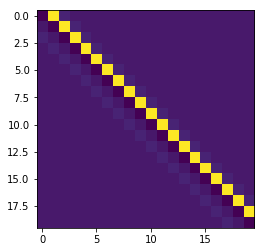

In [9]:

x = shuffle(C_matrix,random_state=20)

print(np.min(x))
print(np.max(x))
x = x - np.min(x)

print(np.min(x))
print(np.max(x))

x = x/np.max(x)
# x = x/np.max(np.abs(x))


print(np.min(x))
print(np.max(x))

print (x.shape)


A = x[0]
A = np.reshape(A, (L, L))
plt.imshow(A)
plt.show()



In [10]:
train_X,valid_X,train_ground,valid_ground = train_test_split(x,
                                                             x, 
                                                             test_size=0.2, 
                                                             random_state=13)


In [11]:
points_of_measurement = np.linspace( 0, 10,5000)

In [12]:
encoded_input = Input(shape=(L, L, 1))

encode = Conv2D(filters=8, 
                 kernel_size=(3,3), 
                 input_shape=(L,L,1), 
                 activation='relu', 
                 padding='same')(encoded_input)
# encode = Conv2D(filters=32, 
#                  kernel_size=(3,3), 
#                  activation='relu', 
#                  padding='same')(encode)
# encode = Conv2D(filters=32, 
#                  kernel_size=(3,3), 
#                  activation='relu', 
#                  padding='same')(encode)
# encode = Conv2D(filters=32, 
#                  kernel_size=(3,3), 
#                  activation='relu', 
#                  padding='same')(encode)
encode = Flatten()(encode)
enocode= Dropout(0.5)(encode)
encode = Dense(units=20, activation='relu')(encode)
# encode = Dense(units=200, activation='relu')(encode)
encode = Dense(units=2, activation='tanh')(encode)


decode= Dropout(0.5)(encode)
decode = Dense(units=20, activation='relu')(decode)

# decode = Dense(units=200, activation='relu')(decode)
decode = Dense(units=L*L*8, activation='relu')(decode)
decode = Reshape((L, L, 8))(decode)
# decode = Conv2D(filters=32, 
#                  kernel_size=(3,3), 
#                  activation='relu', 
#                  padding='same')(decode)
# decode = Conv2D(filters=32, 
#                  kernel_size=(3,3), 
#                  activation='relu', 
#                  padding='same')(decode)
# decode = Conv2D(filters=16, 
#                  kernel_size=(3,3), 
#                  activation='relu', 
#                  padding='same')(decode)
decode = Conv2D(filters=1, 
                 kernel_size=(3,3), 
                 input_shape=(L,L,1), 
                 activation='relu', 
                 padding='same')(decode)

autoencoder = Model(encoded_input, decode)
encoder = Model(encoded_input, encode)

autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 8)         80        
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                64020     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 42        
_________________________________________________________________
dropout_2 (Dropout)          (None, 2)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                60        
__________

In [13]:
epochs = 200
autoencoder.compile(optimizer= Adam(), loss='mean_squared_error')
autoencoder_train = autoencoder.fit(train_X , train_ground , epochs=epochs, validation_data=(valid_X, valid_ground) )

Train on 4000 samples, validate on 1000 samples
Epoch 1/200
4000/4000 [==============================] - 5s 1ms/step - loss: 0.0483 - val_loss: 0.0174
Epoch 2/200
4000/4000 [==============================] - 1s 298us/step - loss: 0.0020 - val_loss: 0.0134
Epoch 3/200
4000/4000 [==============================] - 1s 312us/step - loss: 0.0012 - val_loss: 0.0133
Epoch 4/200
4000/4000 [==============================] - 1s 295us/step - loss: 0.0011 - val_loss: 0.0132
Epoch 5/200
4000/4000 [==============================] - 1s 294us/step - loss: 0.0010 - val_loss: 0.0134
Epoch 6/200
4000/4000 [==============================] - 1s 296us/step - loss: 0.0010 - val_loss: 0.0133
Epoch 7/200
4000/4000 [==============================] - 1s 299us/step - loss: 0.0010 - val_loss: 0.0135
Epoch 8/200
4000/4000 [==============================] - 1s 312us/step - loss: 0.0010 - val_loss: 0.0131
Epoch 9/200
4000/4000 [==============================] - 1s 299us/step - loss: 0.0010 - val_loss: 0.0131
Epoch 10/

Epoch 78/200
4000/4000 [==============================] - 1s 296us/step - loss: 0.0011 - val_loss: 0.0100
Epoch 79/200
4000/4000 [==============================] - 1s 293us/step - loss: 0.0010 - val_loss: 0.0099
Epoch 80/200
4000/4000 [==============================] - 1s 295us/step - loss: 0.0010 - val_loss: 0.0102
Epoch 81/200
4000/4000 [==============================] - 1s 300us/step - loss: 0.0010 - val_loss: 0.0096
Epoch 82/200
4000/4000 [==============================] - 1s 307us/step - loss: 0.0010 - val_loss: 0.0103
Epoch 83/200
4000/4000 [==============================] - 1s 312us/step - loss: 0.0010 - val_loss: 0.0100
Epoch 84/200
4000/4000 [==============================] - 1s 373us/step - loss: 0.0010 - val_loss: 0.0102
Epoch 85/200
4000/4000 [==============================] - 1s 316us/step - loss: 0.0010 - val_loss: 0.0098
Epoch 86/200
4000/4000 [==============================] - 2s 440us/step - loss: 0.0010 - val_loss: 0.0099
Epoch 87/200
4000/4000 [======================

4000/4000 [==============================] - 1s 313us/step - loss: 0.0010 - val_loss: 0.0055
Epoch 155/200
4000/4000 [==============================] - 1s 312us/step - loss: 0.0010 - val_loss: 0.0055
Epoch 156/200
4000/4000 [==============================] - 1s 310us/step - loss: 0.0010 - val_loss: 0.0054
Epoch 157/200
4000/4000 [==============================] - 1s 303us/step - loss: 0.0010 - val_loss: 0.0055
Epoch 158/200
4000/4000 [==============================] - 1s 322us/step - loss: 0.0010 - val_loss: 0.0053
Epoch 159/200
4000/4000 [==============================] - 1s 321us/step - loss: 0.0010 - val_loss: 0.0056
Epoch 160/200
4000/4000 [==============================] - 1s 303us/step - loss: 0.0010 - val_loss: 0.0052
Epoch 161/200
4000/4000 [==============================] - 1s 307us/step - loss: 0.0010 - val_loss: 0.0053
Epoch 162/200
4000/4000 [==============================] - 1s 308us/step - loss: 0.0010 - val_loss: 0.0050
Epoch 163/200
4000/4000 [==========================

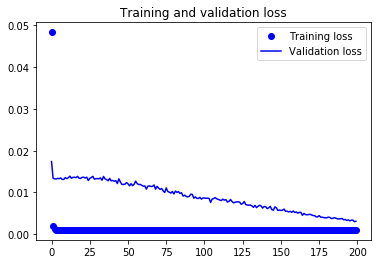

In [15]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')#new_model_shan
plt.title('Training and validation loss')


plt.legend()
plt.show()

In [16]:
# model_json1 = autoencoder.to_json()
# model_json2 = encoder.to_json()
# with open("autoencoder.json", "w") as json_file:
#     json_file.write(model_json1)
# with open("encoder.json", "w") as json_file:
#     json_file.write(model_json2)

# autoencoder.save_weights("autoencoder_weights.h5")

# encoder.save_weights("encoder_weights.h5")

In [17]:
# # save model shan
# autoencoder.save('shan_autoencoder.h5')
# encoder.save('shan_encoder.h5')


In [18]:
# load model shan
autoencoder=keras.models.load_model('shan_autoencoder.h5')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 8)         80        
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                64020     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 42        
_________________________________________________________________
dropout_10 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_19 (Dense)             (None, 20)                60        
__________

C:\Users\Cheng\Anaconda3\lib\site-packages\keras\engine\saving.py:304: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


In [19]:
# load model shan
encoder=keras.models.load_model('shan_encoder.h5')
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 20, 20, 1)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 8)         80        
_________________________________________________________________
flatten_5 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 20)                64020     
_________________________________________________________________
dense_18 (Dense)             (None, 2)                 42        
Total params: 64,142
Trainable params: 64,142
Non-trainable params: 0
_________________________________________________________________


C:\Users\Cheng\Anaconda3\lib\site-packages\keras\engine\saving.py:269: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [20]:
# autoencoder = keras.models.model_from_json("autoencoder.json")
# encoder = keras.models.model_from_json("encoder.json")

In [21]:

# encoded_imgs_low = encoder.predict(C_matrix_low)
# encoded_imgs_high = encoder.predict(C_matrix_high)

C_matrix_augmented = C_matrix - np.min(C_matrix)
C_matrix_augmented = C_matrix_augmented/np.max(C_matrix_augmented)

encoded_imgs = encoder.predict(C_matrix_augmented)
encoded_imgs_copy = np.copy(encoded_imgs)


# new_imgs_high = autoencoder.predict(C_matrix_high)
# new_imgs_low = autoencoder.predict(C_matrix_low)
new_imgs = autoencoder.predict(C_matrix_augmented)





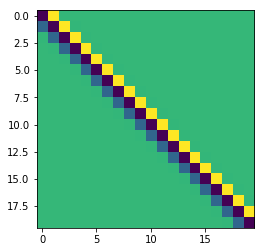

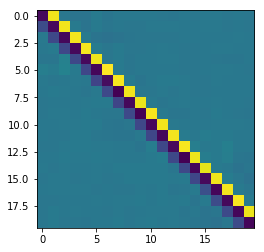

In [22]:
A = train_ground[0]
A = np.reshape(A, (L, L))
plt.imshow(A)
plt.show()

A = new_imgs[0]
A = np.reshape(A, (L, L))
plt.imshow(A)
plt.show()


In [24]:
##z_val[500]

No handles with labels found to put in legend.


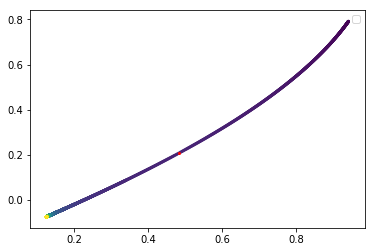

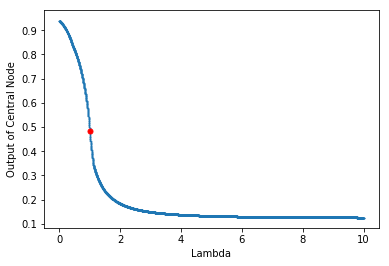

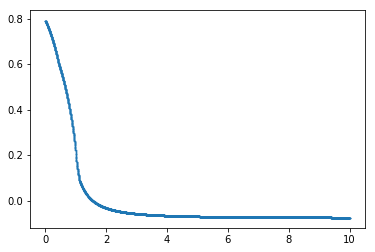

In [25]:
# x_val_low = encoded_imgs_low[:,0]
# y_val_low = encoded_imgs_low[:,1]
# x_val_high = encoded_imgs_high[:,0]
# y_val_high = encoded_imgs_high[:,1]
x_val = encoded_imgs[:,0]
y_val=  encoded_imgs[:,1]
z_val = points_of_measurement


# plt.scatter(x_val_low,y_val_low,color='red')
# plt.show()
# plt.scatter(x_val_high,y_val_high,color='black')
# plt.show()

plt.scatter(x_val,y_val, c = z_val,s=5)
plt.plot([x_val[500]],[y_val[500]],'ro',markersize=2)
plt.legend()
plt.show()


plt.scatter(z_val,x_val,s=0.5)
plt.plot([z_val[500]],[x_val[500]],'ro',markersize=5)
plt.xlabel("Lambda")
plt.ylabel("Output of Central Node")
plt.show()


plt.scatter(z_val,y_val,s=0.5)
# plt.plot([z_val[500]],[y_val[500]],'ro',markersize=12)
plt.show()

# grad=np.gradient(x_val)
# plt.xlabel("Lambda")
# plt.ylabel("Derivative")
# plt.scatter(z_val,grad,s=0.5)
# plt.show()

# grad=np.gradient(grad)
# plt.xlabel("Lambda")
# plt.ylabel("Derivative")
# plt.scatter(z_val,grad,s=0.5)
# # plt.plot([z_val[500]],[y_val[500]],'ro',markersize=12)
# plt.show()

No handles with labels found to put in legend.


[0 0 0 ... 1 1 1]


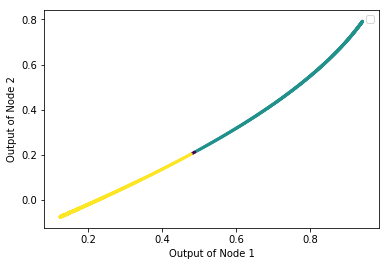

In [26]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.01).fit(encoded_imgs)
plt.xlabel("Output of Node 1")
plt.ylabel("Output of Node 2")
plt.scatter(x_val,y_val, c = clustering.labels_,s=5)
print(clustering.labels_)
# plt.plot([x_val[500]],[y_val[500]],'ro',markersize=2)
plt.legend()
plt.show()


[]

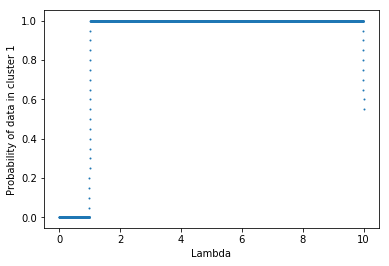

In [27]:
# print(clustering.labels_)
window = 10

# print(indices)
# print(np.where(indices[0]<2))
prob_val = []
cluster = 1
size = len(clustering.labels_)
for i in range(size):
    if i < window :
        values = clustering.labels_[:i+10]
    else :
        values = clustering.labels_[i-10:i+10]
    prob_val.append( len(np.where(values == cluster)[0])/(2*window) )

plt.scatter(z_val,prob_val,s=1)
plt.xlabel("Lambda")
plt.ylabel("Probability of data in cluster 1")
plt.plot()

In [28]:
# encoded_imgs_copy.sort(axis=0)
# check_this.sort(axis=0)
# print(encoded_imgs.shape)
# plt.plot(encoded_imgs)
# plt.ylabel('Output of Lambda')
# plt.xlabel('Matrix id')

In [29]:
# from mpl_toolkits.mplot3d import Axes3D 


# x_val = encoded_imgs_copy[:,0]
# y_val=  encoded_imgs_copy[:,1]
# z_val = points_of_measurement

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(x_val, y_val, z_val )

# plt.show()





# plt.scatter(x_val,y_val)
# plt.show()


# plt.scatter(z_val,x_val)
# plt.show()


# plt.scatter(z_val,y_val)
# plt.show()




In [30]:
# points = []
# for i in range(len(points_of_measurement)) :
#     points.append((x_val[i],y_val[i],z_val[i]))
    
# for i in points :
#     print(i)